In [126]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

In [127]:
df = pd.read_csv('etsy.csv')
print(df['Year'].size)
df.head()

11


,Year,Total Users(in mn),Buyers(in mn),Sellers(in mn),Revenue(in bn)
0,2012,9.3,8.5,0.8,0.07
1,2013,14.0,13.0,1.0,0.12
2,2014,19.8,18.5,1.3,0.19
3,2015,24.0,22.5,1.5,0.27
4,2016,28.5,26.8,1.7,0.36


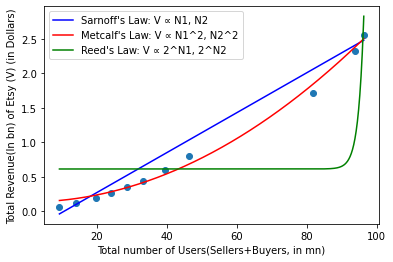

In [128]:
X = np.array(df['Total Users(in mn)'])
X1 = np.array(df['Buyers(in mn)'])
X2 = np.array(df['Sellers(in mn)'])
Y = np.array(df['Revenue(in bn)']).reshape(-1, 1)
X_inflated = np.linspace(X[0].item(), X[X.shape[0]-1].item(), 1000)
X1_inflated = np.linspace(X1[0].item(), X1[X1.shape[0]-1].item(), 1000)
X2_inflated = np.linspace(X2[0].item(), X2[X2.shape[0]-1].item(), 1000)

X_Sarnoff = np.column_stack((X1, X2))
Sarnoff_model = LinearRegression()
Sarnoff_model.fit(X_Sarnoff, Y)
X_Sarnoff_inflated = np.column_stack((X1_inflated, X2_inflated))
Y_pred_Sarnoff_inflated = Sarnoff_model.predict(X_Sarnoff_inflated)

X_poly = np.square(np.column_stack((X1, X2)))
Metcalf_model = LinearRegression()
Metcalf_model.fit(X_poly, Y)
X_inflated_poly = np.square(np.column_stack((X1_inflated, X2_inflated)))
Y_pred_Metcalf_inflated = Metcalf_model.predict(X_inflated_poly)

X_power = np.power(2, np.column_stack((X1, X2)))
Reed_model = LinearRegression()
Reed_model.fit(X_power, Y)
X_inflated_power = np.power(2, np.column_stack((X1_inflated, X2_inflated)))
Y_pred_Reed_inflated = Reed_model.predict(X_inflated_power)

plt.scatter(X, Y)
plt.plot(X_inflated, Y_pred_Sarnoff_inflated, color='b', label="Sarnoff's Law: V ∝ N1, N2")
plt.plot(X_inflated, Y_pred_Metcalf_inflated, color='r', label="Metcalf's Law: V ∝ N1^2, N2^2")
plt.plot(X_inflated, Y_pred_Reed_inflated, color='g', label="Reed's Law: V ∝ 2^N1, 2^N2")
plt.xlabel("Total number of Users(Sellers+Buyers, in mn)")
plt.ylabel("Total Revenue(In bn) of Etsy (V) (in Dollars)")
plt.legend()
plt.show()

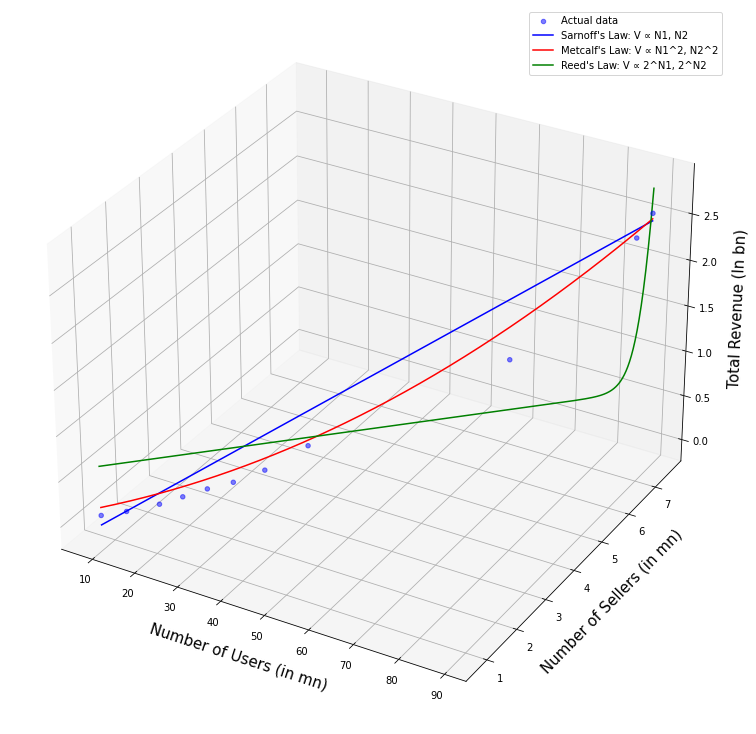

In [129]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, color='blue', label='Actual data', alpha=0.5)

ax.plot3D(X1_inflated.flatten(), X2_inflated.flatten(), Y_pred_Sarnoff_inflated.flatten(), color='b', label="Sarnoff's Law: V ∝ N1, N2")
ax.plot3D(X1_inflated.flatten(), X2_inflated.flatten(), Y_pred_Metcalf_inflated.flatten(), color='r', label="Metcalf's Law: V ∝ N1^2, N2^2")
ax.plot3D(X1_inflated.flatten(), X2_inflated.flatten(), Y_pred_Reed_inflated.flatten(), color='g', label="Reed's Law: V ∝ 2^N1, 2^N2")
ax.set_xlabel('Number of Users (in mn)', fontsize=15)
ax.set_ylabel('Number of Sellers (in mn)', fontsize=15)
ax.set_zlabel("Total Revenue (In bn)", fontsize=15)
ax.xaxis.labelpad = 10
ax.yaxis.labelpad = 10
ax.zaxis.labelpad = 10  # Increase the z-axis label padding
# ax.tick_params(axis='x', labelsize=5)
# ax.tick_params(axis='y', labelsize=5)
# ax.tick_params(axis='z', labelsize=5)
ax.legend(fontsize=10)
ax.patch.set_alpha(0)  # Set the background of the plot to transparent
fig.subplots_adjust(left=0, right=1, bottom=0, top=1)  # Adjust the position of the plot
plt.show()

In [130]:
def F_Statistic(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)  
    dfn = x.size-1 
    dfd = y.size-1  
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) 
    return f, p

print('Sarnoff\'s Model:')
print('R Square =', r2_score(Y, Sarnoff_model.predict(X_Sarnoff)))
print('F value =', F_Statistic(Y, Sarnoff_model.predict(X_Sarnoff))[0], '\n')

print('Metcalf\'s Model:')
print('R Square =', r2_score(Y, Metcalf_model.predict(X_poly)))
print('F value =', F_Statistic(Y, Metcalf_model.predict(X_poly))[0], '\n')

print('Reed\'s Model:')
print('R Square =', r2_score(Y, Reed_model.predict(X_power)))
print('F value =', F_Statistic(Y, Reed_model.predict(X_power))[0], '\n')

# print(Sarnoff_model.coef_[0][0])

Sarnoff's Model:
R Square = 0.994796359132093
F value = 1.0052308603867899 

Metcalf's Model:
R Square = 0.9933519136660577
F value = 1.0066925791781154 

Reed's Model:
R Square = 0.5425535663913041
F value = 1.8431359813028545 



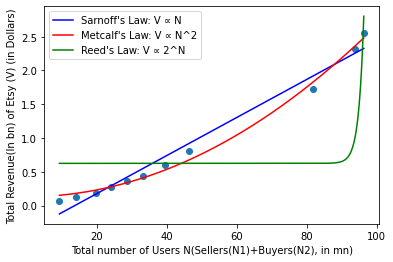

In [131]:
X_total = X1+X2
X_total = X_total.reshape(-1, 1)
X_inflated = np.linspace(X_total[0].item(), X_total[X_total.shape[0]-1].item(), 1000).reshape(-1, 1)

Sarnoff_model = LinearRegression()
Sarnoff_model.fit(X_total, Y)
Y_pred_Sarnoff_inflated = Sarnoff_model.predict(X_inflated)

X_poly = np.square(X_total)
Metcalf_model = LinearRegression()
Metcalf_model.fit(X_poly, Y)
X_inflated_poly = np.square(X_inflated)
Y_pred_Metcalf_inflated = Metcalf_model.predict(X_inflated_poly)

X_power = np.power(2, X_total)
Reed_model = LinearRegression()
Reed_model.fit(X_power, Y)
X_inflated_power = np.power(2, X_inflated)
Y_pred_Reed_inflated = Reed_model.predict(X_inflated_power)

plt.scatter(X, Y)
plt.plot(X_inflated, Y_pred_Sarnoff_inflated, color='b', label="Sarnoff's Law: V ∝ N")
plt.plot(X_inflated, Y_pred_Metcalf_inflated, color='r', label="Metcalf's Law: V ∝ N^2")
plt.plot(X_inflated, Y_pred_Reed_inflated, color='g', label="Reed's Law: V ∝ 2^N")
plt.xlabel("Total number of Users N(Sellers(N1)+Buyers(N2), in mn)")
plt.ylabel("Total Revenue(In bn) of Etsy (V) (in Dollars)")
plt.legend()
plt.show()

In [132]:
def F_Statistic(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1)  
    dfn = x.size-1 
    dfd = y.size-1  
    p = 1-scipy.stats.f.cdf(f, dfn, dfd) 
    return f, p

print('Sarnoff\'s Model:')
print('R Square =', r2_score(Y, Sarnoff_model.predict(X_total)))
print('F value =', F_Statistic(Y, Sarnoff_model.predict(X_total))[0], '\n')

print('Metcalf\'s Model:')
print('R Square =', r2_score(Y, Metcalf_model.predict(X_poly)))
print('F value =', F_Statistic(Y, Metcalf_model.predict(X_poly))[0], '\n')

print('Reed\'s Model:')
print('R Square =', r2_score(Y, Reed_model.predict(X_power)))
print('F value =', F_Statistic(Y, Reed_model.predict(X_power))[0], '\n')

# print(Sarnoff_model.coef_[0][0])

Sarnoff's Model:
R Square = 0.9767671933983231
F value = 1.0237854083948568 

Metcalf's Model:
R Square = 0.9930284394797774
F value = 1.0070205043914702 

Reed's Model:
R Square = 0.5235003890665222
F value = 1.9102182555836245 

